# Navy Seal Burpees

### Progress on Track (2024)

#### Funções:

Importações e Variáveis Globais

In [1]:
import os
import shutil
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Definir o ano atual
ano = '2024'

# Definir o diretório do projeto manualmente ou com base no diretório atual
diretorio_projeto = os.getcwd()

# Caminhos relativos
caminho_csv = os.path.join(diretorio_projeto, f'totais_mensais_{ano}.csv')
caminho_backup = os.path.join(diretorio_projeto, '..', '..', 'backup', f'totais_mensais_{ano}_backup.csv')

# Dicionário global para armazenar os totais mensais
totais_mensais = {f'{ano}-{mes:02d}': 0 for mes in range(1, 13)}


Função para Criar DataFrame Mensal

In [2]:
def criar_df_mensal(mes, ano):
    """
    Cria um DataFrame para o mês e ano fornecidos.
    """
    num_dias = calendar.monthrange(int(ano), mes)[1]
    dias = pd.date_range(start=f'{ano}-{mes:02d}-01', periods=num_dias, freq='D')
    return pd.DataFrame(index=dias, columns=['NSB'])


Função para Coletar Dados

In [3]:
def coletar_dados(mes, ano):
    """
    Coleta dados de NSB para o mês e ano fornecidos.
    """
    df = criar_df_mensal(mes, ano)
    num_dias = len(df)
    dados_nsbs = []

    for dia in range(1, num_dias + 1):
        while True:
            try:
                valor = input(f"Digite o número de NSBs para o dia {dia} (ou pressione Enter para 0): ").strip()
                if valor == '':
                    valor = 0
                else:
                    valor = int(valor)
                if valor < 0:
                    raise ValueError("O valor não pode ser negativo.")
                dados_nsbs.append(valor)
                break
            except ValueError as e:
                print(f"Entrada inválida. {e}. Por favor, digite um número inteiro.")
    
    if len(dados_nsbs) > num_dias:
        dados_nsbs = dados_nsbs[:num_dias]
    elif len(dados_nsbs) < num_dias:
        dados_nsbs.extend([0] * (num_dias - len(dados_nsbs)))
    
    return df, dados_nsbs


Função para Revisar Dados

In [4]:
def revisar_dados(df, dados_nsbs):
    """
    Permite ao usuário revisar e corrigir os dados inseridos.
    """
    while True:
        revisar_dados = input("Deseja alterar algum valor? [s/n] (Pressione enter para continuar): ").strip().lower()
        
        if revisar_dados == 's':
            print("\nDados Inseridos:")
            for dia, valor in enumerate(dados_nsbs, start=1):
                print(f"Dia {dia}: {valor}")
            
            while True:
                try:
                    revisar_dia = input("\nDigite o número do dia para corrigir (ou pressione Enter para continuar): ").strip()
                    if revisar_dia == '':
                        break
                    dia_corrigir = int(revisar_dia)
                    if 1 <= dia_corrigir <= len(dados_nsbs):
                        novo_valor = input(f"Digite o novo número de NSBs para o dia {dia_corrigir}: ").strip()
                        if novo_valor == '':
                            novo_valor = 0
                        else:
                            novo_valor = int(novo_valor)
                        if novo_valor < 0:
                            raise ValueError("O valor não pode ser negativo.")
                        dados_nsbs[dia_corrigir - 1] = novo_valor
                        df['NSB'] = dados_nsbs
                    else:
                        print("Número do dia inválido.")
                except ValueError as e:
                    print(f"Entrada inválida. {e}. Por favor, digite um número inteiro.")
        elif revisar_dados == '':
            break
        else:
            print("Resposta inválida. Por favor, digite 's' para sim ou pressione Enter para continuar.")
            continue


Função para Adicionar Dados e Plotar

In [5]:
def adicionar_dados_e_plotar(mes, ano):
    """
    Adiciona os dados de NSB ao DataFrame e gera um gráfico.
    """
    df, dados_nsbs = coletar_dados(mes, ano)
    df['NSB'] = dados_nsbs
    revisar_dados(df, dados_nsbs)
    
    total_nsb_mes = df['NSB'].sum()
    
    # Limpar a saída anterior
    clear_output(wait=True)
    
    plt.figure(figsize=(12, 6))
    plt.bar(df.index.strftime('%d/%b'), df['NSB'])
    plt.title(f'{mes:02d}/{ano} - Total NSB: {total_nsb_mes}')
    plt.xlabel('Dia/Mês')
    plt.ylabel('Navy Seal Burpees')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()
    
    # Atualizar totais mensais
    chave = f'{ano}-{mes:02d}'
    totais_mensais[chave] = total_nsb_mes

    # Salvar o CSV atualizado
    salvar_totais_csv(caminho_csv, totais_mensais)

    # Fazer backup do CSV
    fazer_backup_csv(caminho_csv, caminho_backup)


Função para Salvar Totais Mensais em CSV

In [6]:
def salvar_totais_csv(caminho, totais):
    """
    Salva os totais mensais em um arquivo CSV.
    """
    df_totais = pd.DataFrame(list(totais.items()), columns=['Mes', 'Total'])
    os.makedirs(os.path.dirname(caminho), exist_ok=True)  # Certifica-se de que o diretório existe
    df_totais.to_csv(caminho, index=False)


Função para Fazer Backup do CSV

In [7]:
def fazer_backup_csv(caminho_origem, caminho_destino):
    """
    Faz uma cópia de backup do arquivo CSV.
    """
    os.makedirs(os.path.dirname(caminho_destino), exist_ok=True)  # Certifica-se de que o diretório existe
    shutil.copyfile(caminho_origem, caminho_destino)


Função para Carregar Totais Mensais do CSV

In [8]:
def carregar_totais_csv(caminho):
    """
    Carrega os totais mensais de um arquivo CSV, se existir.
    """
    if os.path.exists(caminho):
        df_totais = pd.read_csv(caminho)
        totais = df_totais.set_index('Mes')['Total'].to_dict()
        return totais
    else:
        return None

# Carregar totais do CSV ao iniciar
totais_carregados = carregar_totais_csv(caminho_csv)
if totais_carregados:
    totais_mensais.update(totais_carregados)


Função para Calcular Totais Mensais

In [9]:
def calcular_totais_mensais():
    """
    Retorna um dicionário com o total de NSBs para cada mês.
    """
    return totais_mensais


Função para Imprimir Totais Mensais

In [10]:
def print_totais_mensais():
    totais = calcular_totais_mensais()
    output_str = "    "
    for count, (mes, total) in enumerate(totais.items(), 1):
        output_str += f"'{mes}': {total}, "
        if count % 6 == 0 and count != len(totais):
            output_str = output_str.rstrip(", ") + ",\n    "
    output_str = output_str.rstrip(", ") + ","
    print(output_str)

# print_totais_mensais()

## per month

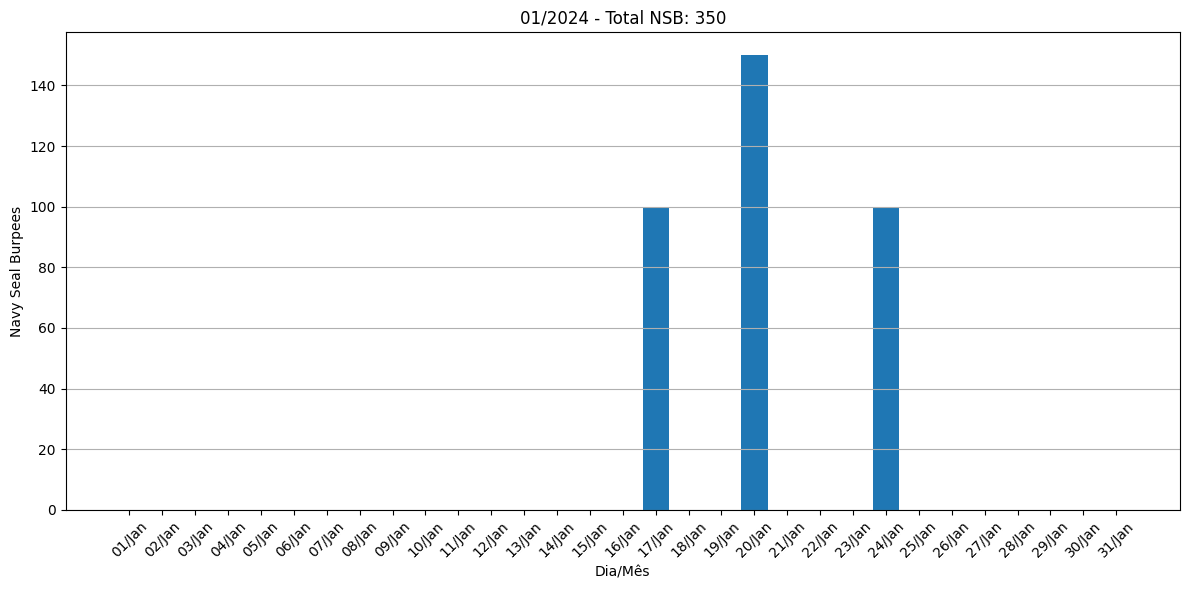

In [10]:
adicionar_dados_e_plotar(1, ano)

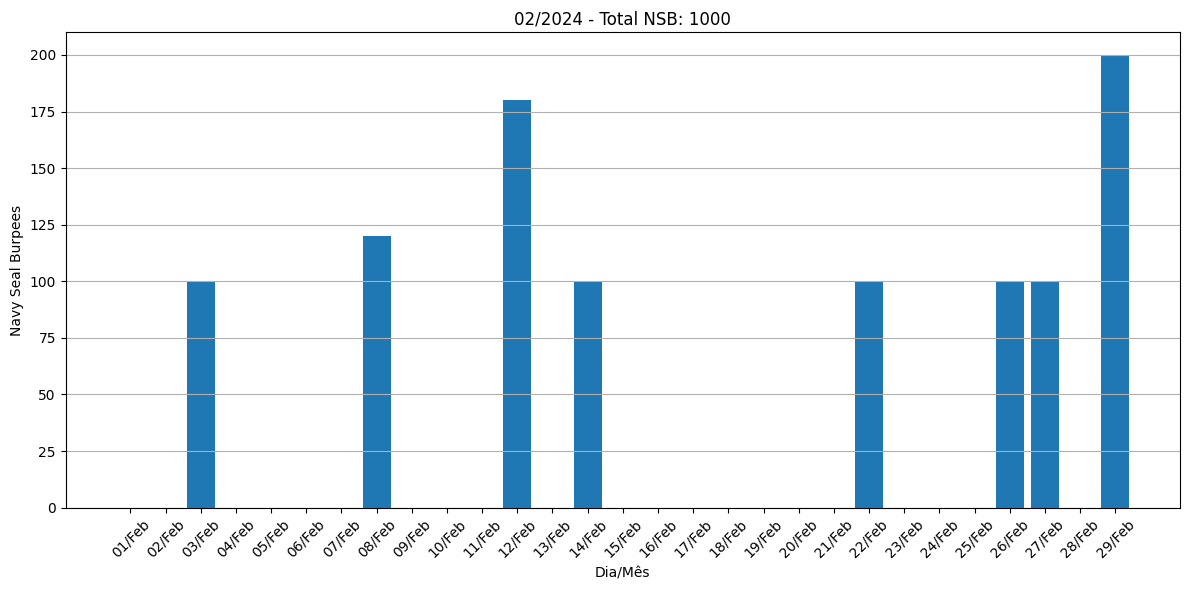

In [12]:
adicionar_dados_e_plotar(2, ano)

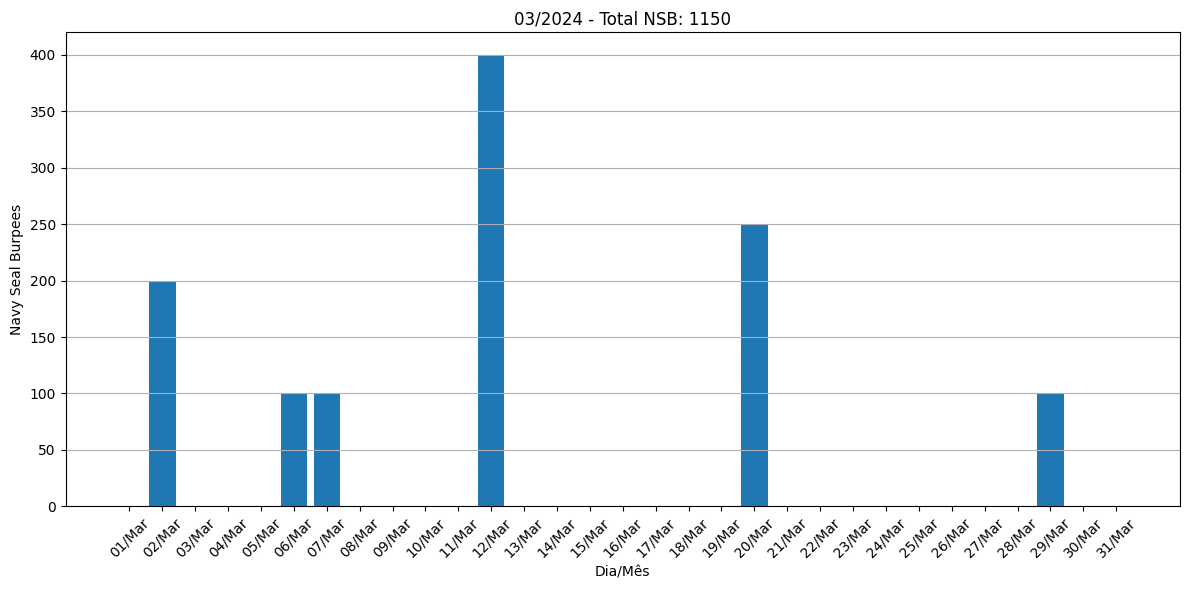

In [13]:
adicionar_dados_e_plotar(3, ano)

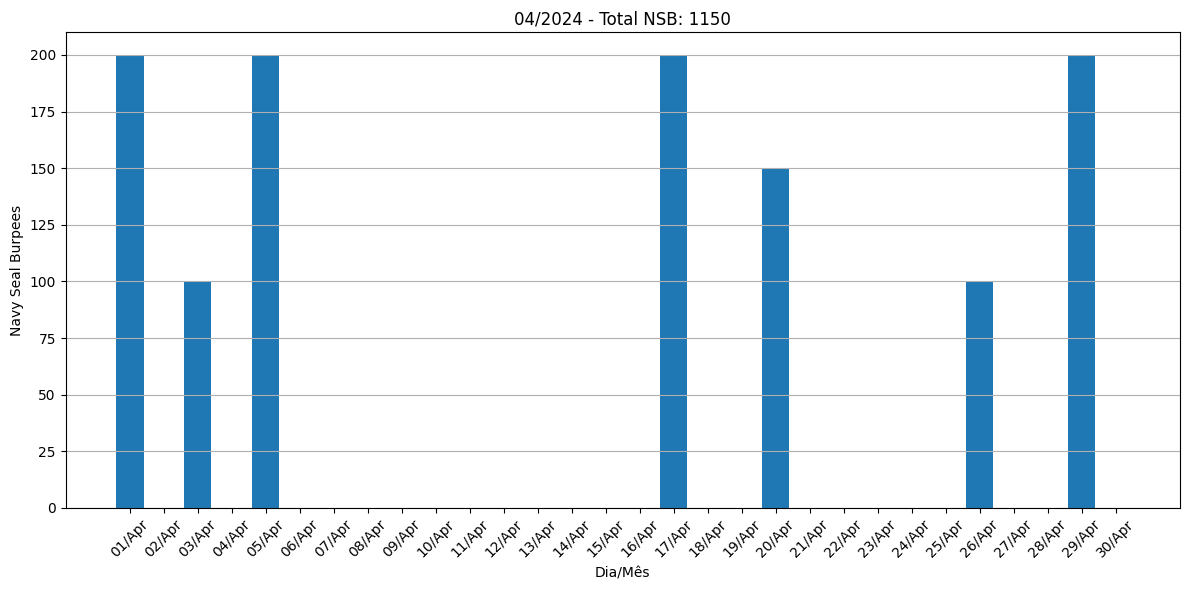

In [14]:
adicionar_dados_e_plotar(4, ano) 

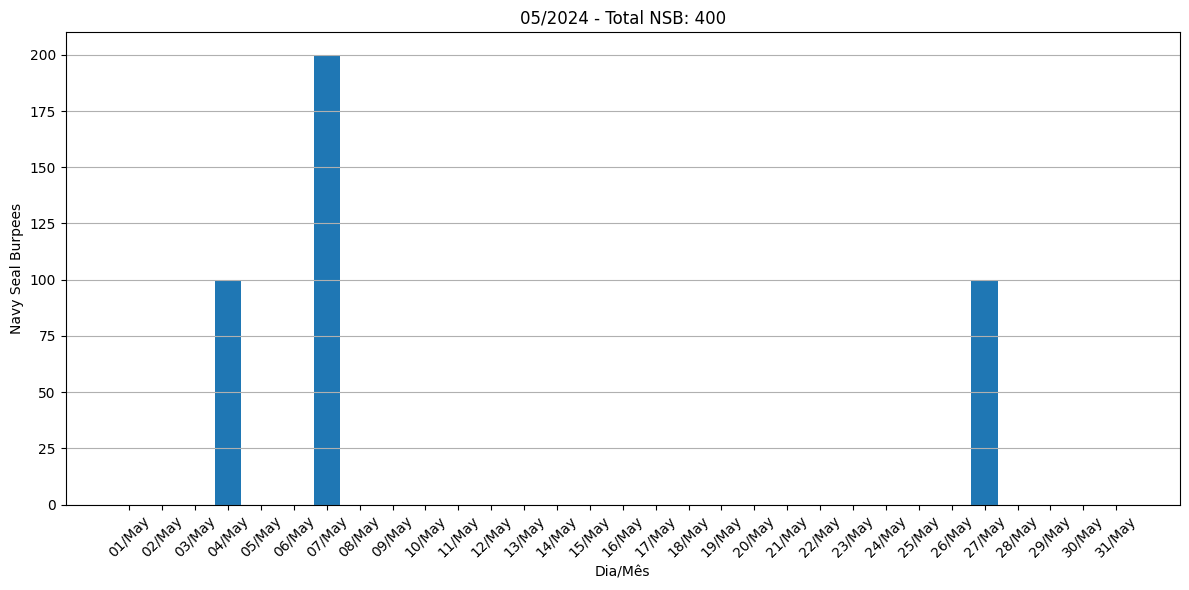

In [16]:
adicionar_dados_e_plotar(5, ano) 

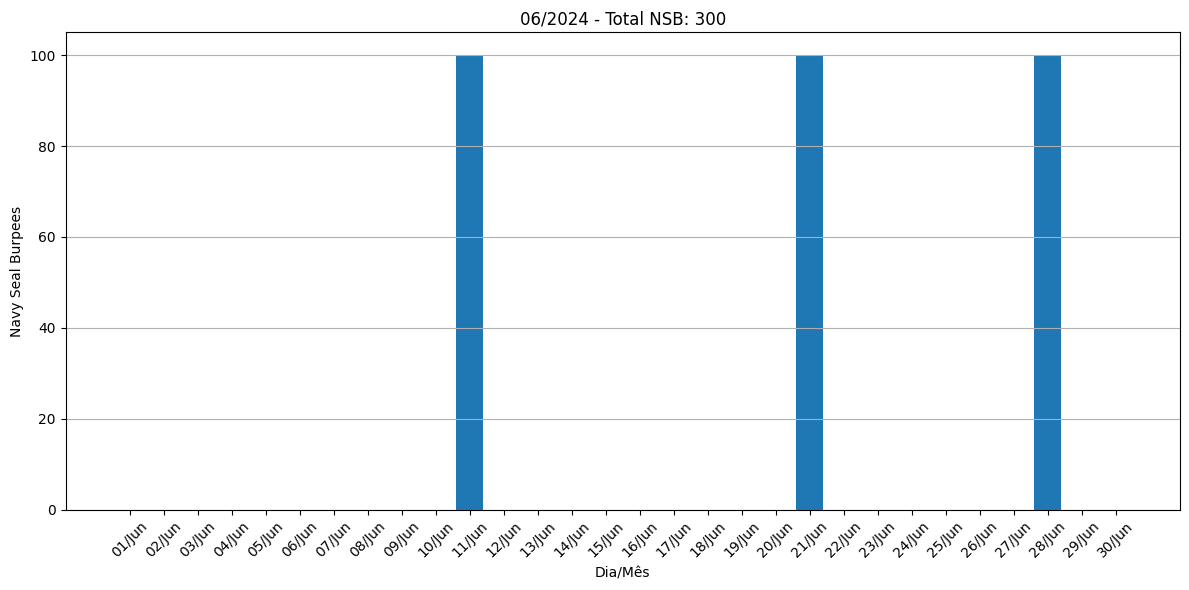

In [10]:
adicionar_dados_e_plotar(6, ano) 

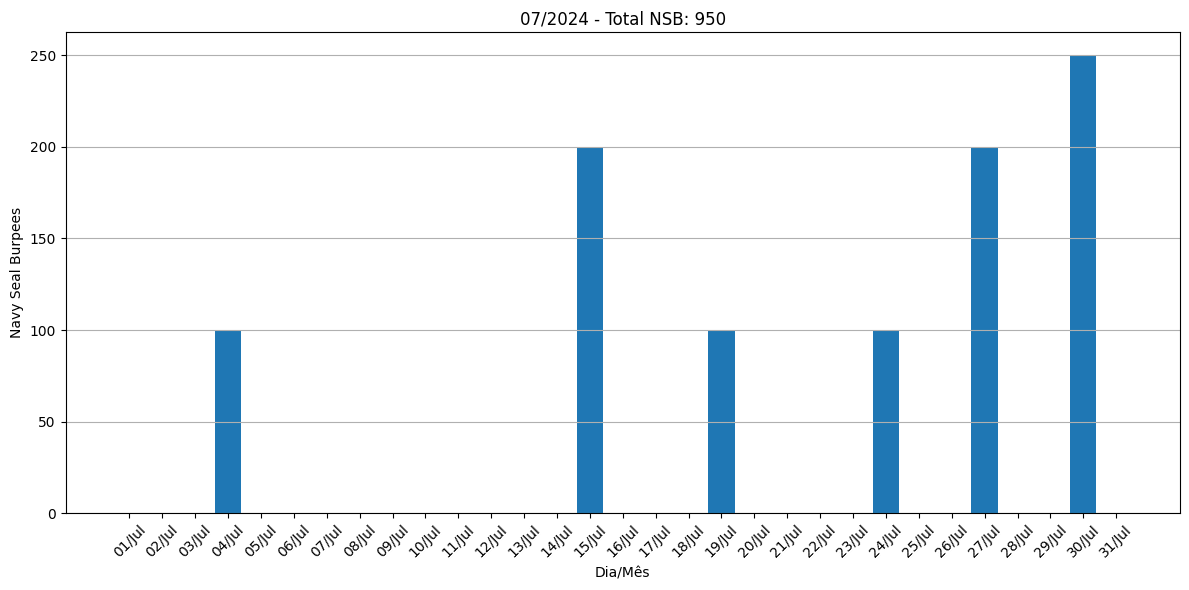

In [18]:
adicionar_dados_e_plotar(7, ano) 

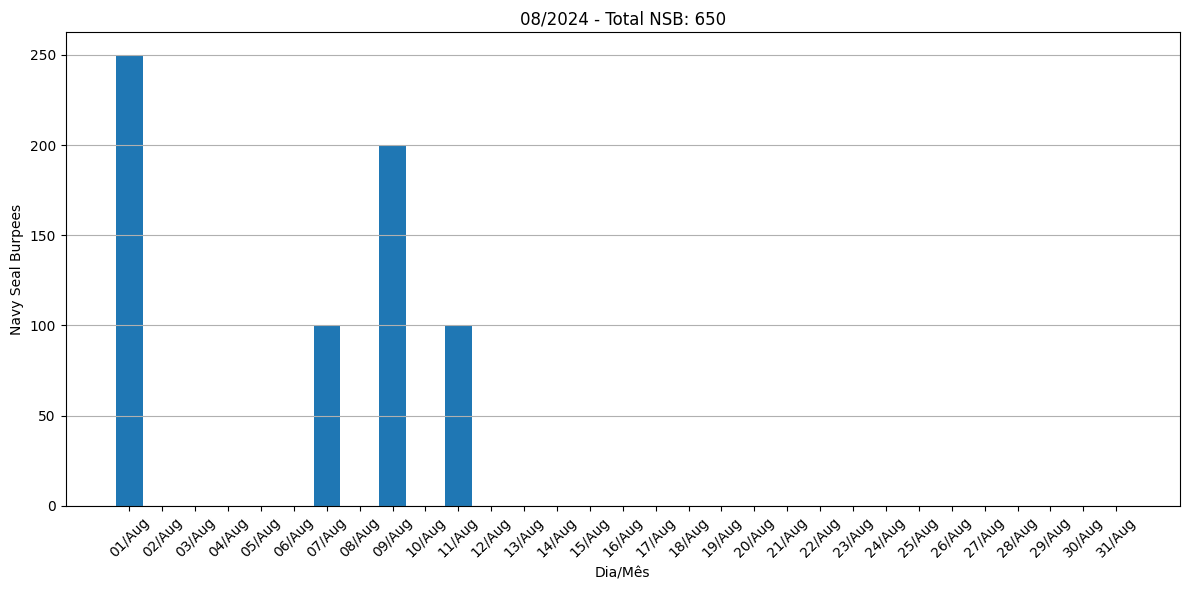

In [11]:
adicionar_dados_e_plotar(8, ano) 

In [ ]:
adicionar_dados_e_plotar(9, ano) 

In [ ]:
adicionar_dados_e_plotar(10, ano 

In [ ]:
adicionar_dados_e_plotar(11, ano)

In [ ]:
adicionar_dados_e_plotar(12, ano)